In [1]:
#import Pakete
#plotten:
import matplotlib as mlp
import matplotlib.pyplot as plt
#rechnen:
import numpy as np
#fitten:
import scipy 
from scipy.optimize import curve_fit
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelextrema
import scipy.special as sp
import scipy.constants as sp # für grundlegende Konstanten --> https://docs.scipy.org/doc/scipy/reference/constants.html
#--> eher selbst machen 
#paket für automatische invertierung Funktion --> sehr nützlich
#from pynverse import inversefunc
#dateneinlesen einfach
import pylab as py 

# Fittfunktionen

In [2]:
#def Fittfunktionen

#Grundfunktionen
def Lorentz(x,a,d,w):
#c Konstante, a Amplitude, d Halbwärtsbreite, w mittelpunkt , x variable
# y = a/(1+ ((x-w) / (d/2) )**2)
    return  a/(1+ ((x-w) / (d/2) )**2)

def gaussian(x, a, c, b):
    # a Amplitude, b Position, c Breite
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

def linear(x,a,b):
    return a*x+b

def Polynom_3_Grad(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

def Polynom_4_Grad(x,a,b,c,d,e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def Polynom_5_Grad(x,a,b,c,d,e,f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

def Polynom_6_Grad(x,a,b,c,d,e,f,g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

def Polynom_7_Grad(x,a,b,c,d,e,f,g,h):
    return a*x**7 + b*x**6 + c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x + h

def Polynom_8_Grad(x,a,b,c,d,e,f,g,h,i):
    return a*x**8 + b*x**7 + c*x**6 + d*x**5 + e*x**4 + f*x**3 + g*x**2 + h*x + i

def Polynom_10_Grad(x,a,b,c,d,e,f,g,h,i,j,k):
    return a*x**10 + b*x**9 + c*x**8 + d*x**7 + e*x**6 + f*x**5 + g*x**4 + h*x**3 + i*x**2 + j*x + k

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#-----------------#
def L_x4(x,A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4):
    # 4 Lorentzpeaks
    return Lorentz(x,A1,D1,W1) + Lorentz(x,A2,D2,W2) + Lorentz(x,A3,D3,W3) + Lorentz(x,A4,D4,W4)

def L_x5(x,A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4, A5,D5,W5):
    # 5 Lorentzpeaks
    return Lorentz(x,A1,D1,W1) + Lorentz(x,A2,D2,W2) + Lorentz(x,A3,D3,W3) + Lorentz(x,A4,D4,W4) + Lorentz(x,A5,D5,W5)

def l_4L(x,a,b, A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4):
    # linearer Hintergrund + 4 Lorentzpeaks
    return linear(x,a,b) + Lorentz(x,A1,D1,W1) + Lorentz(x,A2,D2,W2) + Lorentz(x,A3,D3,W3) + Lorentz(x,A4,D4,W4)

def l_5L(x,a,b, A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4, A5,D5,W5):
    return linear(x,a,b) + Lorentz(x,A1,D1,W1) + Lorentz(x,A2,D2,W2) + Lorentz(x,A3,D3,W3) + Lorentz(x,A4,D4,W4) + Lorentz(x,A5,D5,W5)

def Lx5(x,A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4, A5,D5,W5):
    return Lorentz(x,A1,D1,W1) + Lorentz(x,A2,D2,W2) + Lorentz(x,A3,D3,W3) + Lorentz(x,A4,D4,W4) + Lorentz(x,A5,D5,W5)




def G_x4(x,A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4):
    # 4 Gausspeaks
    return gaussian(x,A1,D1,W1) + gaussian(x,A2,D2,W2) + gaussian(x,A3,D3,W3) + gaussian(x,A4,D4,W4)

def G_x5(x,A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4, A5,D5,W5):
    # 5 Gausspeaks
    return gaussian(x,A1,D1,W1) + gaussian(x,A2,D2,W2) + gaussian(x,A3,D3,W3) + gaussian(x,A4,D4,W4) + gaussian(x,A5,D5,W5)


# Kalibration
Daten vom 12.03.2021

Fitparameter Ga2O3_peak_348: [305.0667169773189, 16.04617129397299, 345.5523354616021]
Fitparameter Ga2O3_peak_416: [3750.605542741447, 5.1813727646090495, 414.6313498219989]
Fitparameter Ga2O3_peak_476: [1878.6838245865038, 11.634142558532735, 473.2553126628837]
Fitparameter Ga2O3_peak_634: [1232.9966923227314, 8.61306493458583, 627.9901919920275]
Fitparameter Ga2O3_peak_659: [201.52676065799938, 19.999999999999996, 656.1136677309488]


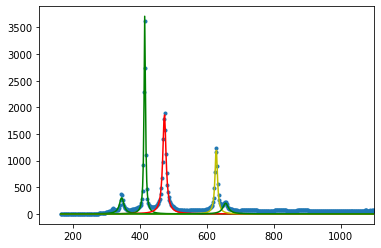

Abweichung Ga2O3_peak_348: 0.44766453839787346
Abweichung Ga2O3_peak_416: 1.0686501780010644
Abweichung Ga2O3_peak_476: 0.7446873371163178
Abweichung Ga2O3_peak_634: 7.009808007972538
Abweichung Ga2O3_peak_659: 3.7863322690511723
Mittlere Abweichung: -0.9066687575586911


In [3]:
#Path zu daten definieren
path = "./Daten//2021.03.12_266nm_InN//"  
x_data_Kall_12_03,y_data_Kall_12_03=py.loadtxt(path+ "Ga2O3_confPH 200_2 x_10 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_13_36_41_01.txt", unpack=True, skiprows=1,encoding='cp1252') #,encoding='cp1252' für linux

#Peakwerte Literatur T. Onuma, 2014, Polarized Raman spectra inβ-Ga2O3single crystals
Ga2O3_peak_348_Lit=346
Ga2O3_peak_416_Lit=415.7
Ga2O3_peak_476_Lit=474
Ga2O3_peak_634_Lit=635
Ga2O3_peak_659_Lit=659.9

#fitten 5 lorentz in saphir_418, saphir_451, InN E2 498, InN LO 595, saphir_751 + 2Asymmetrischer Gauß
#L_x5_AG_x2(x,A1,D1,W1, A2,D2,W2, A3,D3,W3, A4,D4,W4, A5,D5,W5, amp,fwhm,pos,shape, amp2,fwhm2,pos2,shape2):
# 5 Lorentzpeaks + 2 Asymmetrischer gauß
#return Lorentz(x,A1,D1,W1) + Lorentz(x,A2,D2,W2) + Lorentz(x,A3,D3,W3) + Lorentz(x,A4,D4,W4) + Lorentz(x,A5,D5,W5) + asymmgauss(x,amp,fwhm, pos, shape)+ asymmgauss(x,amp2,fwhm2, pos2, shape2)
init_vals_L_x5 = [1,1,348, 1,1,416, 1,1,476, 1,1,634, 1,1,659]
param_bounds_L_x5= ([0,0,340, 0,0,410, 0,0,460, 0,0,625, 0,0,640],
        [10000,20,360, 10000,20,425, 10000,20,490, 10000,20,650, 10000,20,670])
fitParams_L_x5, cov_L_x5 = curve_fit(f=L_x5, xdata=x_data_Kall_12_03, ydata=y_data_Kall_12_03, p0=init_vals_L_x5, bounds=param_bounds_L_x5)
Ga2O3_peak_348=[fitParams_L_x5[0],fitParams_L_x5[1],fitParams_L_x5[2]]
Ga2O3_peak_416=[fitParams_L_x5[3],fitParams_L_x5[4],fitParams_L_x5[5]]
Ga2O3_peak_476=[fitParams_L_x5[6],fitParams_L_x5[7],fitParams_L_x5[8]]
Ga2O3_peak_634=[fitParams_L_x5[9],fitParams_L_x5[10],fitParams_L_x5[11]]
Ga2O3_peak_659=[fitParams_L_x5[12],fitParams_L_x5[13],fitParams_L_x5[14]]
print("Fitparameter Ga2O3_peak_348:",Ga2O3_peak_348)
print("Fitparameter Ga2O3_peak_416:",Ga2O3_peak_416)
print("Fitparameter Ga2O3_peak_476:",Ga2O3_peak_476)
print("Fitparameter Ga2O3_peak_634:",Ga2O3_peak_634)
print("Fitparameter Ga2O3_peak_659:",Ga2O3_peak_659)
       

plt.plot(x_data_Kall_12_03,y_data_Kall_12_03, 'o'  ,markersize=3, label='Messwerte Si') #, markerfacecolor='w', alpha=0.5
plt.plot(x_data_Kall_12_03,Lorentz(x_data_Kall_12_03, Ga2O3_peak_348[0],Ga2O3_peak_348[1],Ga2O3_peak_348[2]), color='g'  ,markersize=3, label='Ga2O3_peak_348')
plt.plot(x_data_Kall_12_03,Lorentz(x_data_Kall_12_03, Ga2O3_peak_416[0],Ga2O3_peak_416[1],Ga2O3_peak_416[2]), color='g'  ,markersize=3, label='Ga2O3_peak_416')
plt.plot(x_data_Kall_12_03,Lorentz(x_data_Kall_12_03, Ga2O3_peak_476[0],Ga2O3_peak_476[1],Ga2O3_peak_476[2]), color='r'  ,markersize=3, label='Ga2O3_peak_476')
plt.plot(x_data_Kall_12_03,Lorentz(x_data_Kall_12_03, Ga2O3_peak_634[0],Ga2O3_peak_634[1],Ga2O3_peak_634[2]), color='y'  ,markersize=3, label='Ga2O3_peak_634')
plt.plot(x_data_Kall_12_03,Lorentz(x_data_Kall_12_03, Ga2O3_peak_659[0],Ga2O3_peak_659[1],Ga2O3_peak_659[2]), color='g'  ,markersize=3, label='Ga2O3_peak_659')  

plt.xlim (100, 1100)
#plt.ylim (0, 1000)

plt.show()

Ga2O3_peak_348_Abweichung=Ga2O3_peak_348_Lit - Ga2O3_peak_348[2]
Ga2O3_peak_416_Abweichung=Ga2O3_peak_416_Lit - Ga2O3_peak_416[2]
Ga2O3_peak_476_Abweichung=Ga2O3_peak_476_Lit - Ga2O3_peak_476[2]
Ga2O3_peak_634_Abweichung=Ga2O3_peak_634_Lit - Ga2O3_peak_634[2]
Ga2O3_peak_659_Abweichung=Ga2O3_peak_659_Lit - Ga2O3_peak_659[2]
print("Abweichung Ga2O3_peak_348:",Ga2O3_peak_348_Abweichung)
print("Abweichung Ga2O3_peak_416:",Ga2O3_peak_416_Abweichung)
print("Abweichung Ga2O3_peak_476:",Ga2O3_peak_476_Abweichung)
print("Abweichung Ga2O3_peak_634:",Ga2O3_peak_634_Abweichung)
print("Abweichung Ga2O3_peak_659:",Ga2O3_peak_659_Abweichung)
#nutze 416,476 da beste peaks und mehrere Literaturwerte
Abweichung=[Ga2O3_peak_416_Abweichung,Ga2O3_peak_476_Abweichung]
Mittlere_Abweichung=np.mean(Abweichung)
print("Mittlere Abweichung:", -Mittlere_Abweichung)
Kall_Wert_12=-Mittlere_Abweichung

# Datenladen

## Luft

In [4]:
#Path zu daten definieren
path = "./Daten//2021.03.12_266nm_InN//"  
#-------------------------------------------------------------------------------------------------------------------
#daten Luft
#print("Air:")
x_data,y_data=py.loadtxt(path+ "Air_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_13_33_01_01.txt", unpack=True, skiprows=1,encoding='cp1252')
for i in range(len(x_data)):
    x_data[i]=x_data[i]-Kall_Wert_12

x=x_data[761:909]
y_Air=y_data[761:909]
#print(x)
#-------------------------------------------------------------------------------------------------------------------

## a-plane

In [5]:
#daten a-plane
x_data,y_data=py.loadtxt(path+ "InN_a-plane_L1065_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_10_34_24_01.txt", unpack=True, skiprows=1,encoding='cp1252')
for i in range(len(x_data)):
    x_data[i]=x_data[i]-Kall_Wert_12
y_a=y_data[761:909]
y_a=y_a-y_Air
#print(y_a)
#daten a-plane rotated
x_data,y_data=py.loadtxt(path+ "InN_a-plane_L1065_rotated by 90deg_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_11_01_12_01.txt", unpack=True, skiprows=1,encoding='cp1252')
for i in range(len(x_data)):
    x_data[i]=x_data[i]-Kall_Wert_12
y_a_r=y_data[761:909]
y_a_r=y_a_r-y_Air
#print(y_a_r)
#daten a-plane 2
#x_data,y_data=py.loadtxt(path+ "InN_a-plane_L1065_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_10_34_24_01_0.txt", unpack=True, skiprows=1)
#y_a_2=y_data[761:909]
#y_a_2=y_a_2-y_Air
#print(y_a)
#daten a-plane rotated 2
#x_data,y_data=py.loadtxt(path+ "InN_a-plane_L1065_rotated by 90deg_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_11_01_12_01_0.txt", unpack=True, skiprows=1)
#y_a_r_2=y_data[761:909]
#y_a_r_2=y_a_r_2-y_Air
#print(y_a_r)
#--> daten Doppelt aus irgendwelchen Gründen(,y_a_2,y_a_r_2)

# Array Daten für vereinfachtes auswerten später
y_daten_aplane = np.vstack([y_a,y_a_r])
#print(y_daten_aplane)

## MBE

In [6]:
#daten MBE
x_data,y_data=py.loadtxt(path+ "InN_c-plane_MBE-870R4_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_12_39_43_01.txt", unpack=True, skiprows=1,encoding='cp1252')
for i in range(len(x_data)):
    x_data[i]=x_data[i]-Kall_Wert_12
y_MBE=y_data[761:909]
y_MBE=y_MBE-y_Air
#print(y_a)
#daten MBE rotated
x_data,y_data=py.loadtxt(path+ "InN_c-plane_MBE-870R4_rotated_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_13_08_01_01.txt", unpack=True, skiprows=1,encoding='cp1252')
for i in range(len(x_data)):
    x_data[i]=x_data[i]-Kall_Wert_12
y_MBE_r=y_data[761:909]
y_MBE_r=y_MBE_r-y_Air
#print(y_a_r)
#daten MBE 2
#x_data,y_data=py.loadtxt(path+ "InN_c-plane_MBE-870R4_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_12_39_43_01_0.txt", unpack=True, skiprows=1)
#y_MBE_2=y_data[761:909]
#y_MBE_2=y_MBE_2-y_Air
#print(y_a)
#daten MBE rotated 2
#x_data,y_data=py.loadtxt(path+ "InN_c-plane_MBE-870R4_rotated_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_13_08_01_01_0.txt", unpack=True, skiprows=1)
#y_MBE_r_2=y_data[761:909]
#y_MBE_r_2=y_MBE_r_2-y_Air
#print(y_a_r)
#--> daten Doppelt aus irgendwelchen Gründen(,y_MBE_2,y_MBE_r_2)

# Array Daten für vereinfachtes auswerten später
y_daten_MBE = np.vstack([y_MBE,y_MBE_r])
#print(y_daten_aplane)

## MEPA 

In [7]:
#daten MEPA
x_data,y_data=py.loadtxt(path+ "InN_c-plane_MEPA-1242_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_11_30_41_01.txt", unpack=True, skiprows=1,encoding='cp1252')
for i in range(len(x_data)):
    x_data[i]=x_data[i]-Kall_Wert_12
y_MEPA=y_data[761:909]
y_MEPA=y_MEPA-y_Air
#print(y_MEPA)
#daten MEPA rotated
x_data,y_data=py.loadtxt(path+ "InN_c-plane_MEPA-1242_rotated_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_12_07_49_01.txt", unpack=True, skiprows=1,encoding='cp1252')
for i in range(len(x_data)):
    x_data[i]=x_data[i]-Kall_Wert_12
y_MEPA_r=y_data[761:909]
y_MEPA_r=y_MEPA_r-y_Air
#print(y_MEPA_r)
#daten MEPA 2
#x_data,y_data=py.loadtxt(path+ "InN_c-plane_MEPA-1242_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_11_30_41_01_0.txt", unpack=True, skiprows=1)
#y_MEPA_2=y_data[761:909]
#y_MEPA_2=y_MEPA_2-y_Air
#print(y_MEPA_2)
#daten MEPA rotated 2
#x_data,y_data=py.loadtxt(path+ "InN_c-plane_MEPA-1242_rotated_confPH 200_2 x_600 s_266 nm_100%_x40 UVB_2400 gr_mm_50 hole_2021_03_12_12_07_49_01_0.txt", unpack=True, skiprows=1)
#y_MEPA_r_2=y_data[761:909]
#y_MEPA_r_2=y_MEPA_r_2-y_Air
#print(y_MEPA_r)
#--> daten Doppelt aus irgendwelchen Gründen(,y_MEPA_2,y_MEPA_r_2)

# Array Daten für vereinfachtes auswerten später
y_daten_MEPA = np.vstack([y_MEPA,y_MEPA_r])
#print(y_daten_aplane)

# Fitten der Daten mit Lorentzfunktionen

## a-plane


Fittdaten a-plane Messung  1 :
A1 TO:  [4.653003776418611, 8.657872766420018, 447.68135857084974]
E1 TO:  [1.041571928886144, 8.265441360182539, 474.61984370100663]
E2:  [10.222706363284727, 6.7246779679443565, 489.77745455657987]
E1 LO:  [0.46753940888975715, 24.094033607365425, 584.9268150846343]


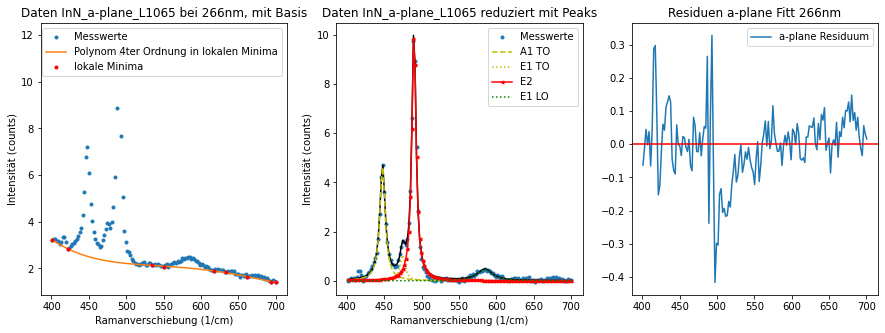


Fittdaten a-plane Messung  2 :
A1 TO:  [1.9948632313608132, 7.966173091671606, 448.4780027826016]
E1 TO:  [0.6213541891334609, 5.6698014483767425, 475.2336792117846]
E2:  [10.65618628194208, 6.295055438696903, 490.0697525280021]
E1 LO:  [0.33204950213451156, 25.53721651146268, 585.8515313230773]


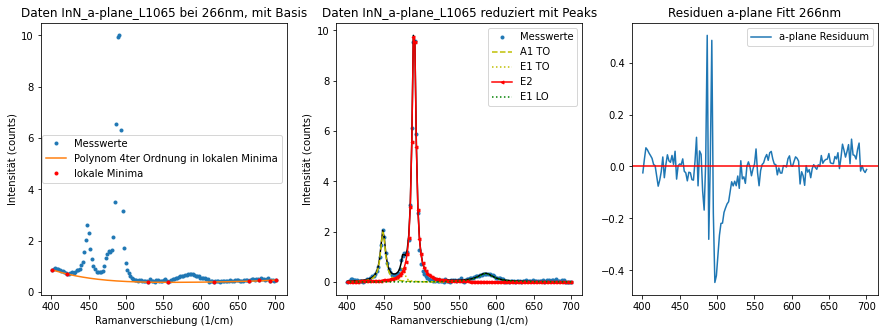

In [9]:
for i in range(len(y_daten_aplane)):
    y = y_daten_aplane[i]

    #----------------------------------------------------------------------------------------------------    
    
    # lokale minima für baseline alle paar messpunkte entnehmen
    ymin_roh=y[argrelextrema(y, np.less,order=5)[0]]
    xmin_roh=x[argrelextrema(y, np.less,order=5)[0]]
    # entfernen störender minima für basis (um TO, E2 Peak da ansonsten Polynom nicht passend an Daten)
    #for j in range(len(xmin_roh)):
    #print(i)
    #    if xmin_roh[j]>450 and xmin_roh[j]>500:
     #       xmin = np.delete(xmin_roh,j+1, axis=None)
      #      ymin = np.delete(ymin_roh,j+1, axis=None)
        
    #minima an problematischen stellen nicht mitnehmen
    xmin=[]
    ymin=[]
    xmin2=[]
    ymin2=[]
    xmin.append(x[0])
    ymin.append(y[0]) 
    for k in range(len(xmin_roh)):
        if xmin_roh[k]<=560 or xmin_roh[k]>=600:
            xmin2.append(xmin_roh[k])
            ymin2.append(ymin_roh[k])
    for j in range(len(xmin2)):
        if xmin2[j]<=450 or xmin2[j]>=500:
            xmin.append(xmin2[j])
            ymin.append(ymin2[j])
    xmin.append(x[len(x)-1])
    ymin.append(y[len(y)-1]) 
    
    # Hintergrund mit Baseline Funktion Polynom 4 aus lokalen Minima fitten
    init_vals_base = [0.1, 0.1, 0.1, 0.1, 0.1]
    param_bounds_base = ([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf])
    fitParams_base, cov_base = curve_fit(f=Polynom_4_Grad, xdata=xmin, ydata=ymin, p0=init_vals_base, bounds=param_bounds_base)
    ybase_P4=Polynom_4_Grad(x, fitParams_base[0], fitParams_base[1], fitParams_base[2], fitParams_base[3], fitParams_base[4])
    
    #Plott
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1) 
    plt.title('Daten InN_a-plane_L1065 bei 266nm, mit Basis')
    plt.plot(x,y, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x, ybase_P4, label='Polynom 4ter Ordnung in lokalen Minima')
    plt.plot(xmin,ymin,'o', color='r'  ,markersize=3, label='lokale Minima') #, markerfacecolor='w', alpha=0.5
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    #Messwerte reduzieren durch Basis
    y_reduced = y - ybase_P4
    
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; E1(LO)-595 1/cm Peaks
    #Lorentz(x,a,d,w)
    init_vals_L_x4 = [1,1,450, 1,1,479, 1,1,492, 1,1,595]
    param_bounds_L_x4= ([0,0,443, 0,0,470, 0,0,480, 0,0,560,],[np.inf,15,455, np.inf,15,490, np.inf,15,500 , np.inf,50,600])
    fitParams_L_x4, cov_L_x4 = curve_fit(f=L_x4, xdata=x, ydata=y_reduced, p0=init_vals_L_x4, bounds=param_bounds_L_x4)
    
    fitParams_L_a_A1_TO = [fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2]]
    fitParams_L_a_E1_TO = [fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5]]
    fitParams_L_a_E2 = [fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8]]
    fitParams_L_a_E1_LO = [fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]]
    
    print("\nFittdaten a-plane Messung ", i+1, ":")
    print("A1 TO: ",fitParams_L_a_A1_TO)
    print("E1 TO: ",fitParams_L_a_E1_TO)
    print("E2: ",fitParams_L_a_E2)
    print("E1 LO: ",fitParams_L_a_E1_LO)
    
    #Plott
    plt.subplot(1, 3, 2) 
    plt.title('Daten InN_a-plane_L1065 reduziert mit Peaks')
    plt.plot(x,y_reduced, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x,L_x4(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2],fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5],fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8],fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]),color="black")
    plt.plot(x,Lorentz(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2]),'--',color="y",label='A1 TO')
    plt.plot(x,Lorentz(x,fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5]),':',color="y",label='E1 TO')
    plt.plot(x,Lorentz(x,fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8]),'-<',markersize=3,color="r",label='E2')
    plt.plot(x,Lorentz(x,fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]),':',markersize=3,color="g",label='E1 LO')
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()
    
    #----------------------------------------------------------------------------------------------------
    #Plott
    plt.subplot(1, 3, 3)
    plt.title('Residuen a-plane Fitt 266nm')
    plt.plot(x,y_reduced-L_x4(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2],fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5],fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8],fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]), label=("a-plane Residuum"))
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    plt.show()

## MBE

Baseparamter:  [-8.74645791e-10  1.95651948e-06 -1.61521420e-03  5.77041043e-01
 -7.19517453e+01]

Fittdaten MBE Messung  1 :
A1 TO:  [0.2035186398993347, 8.221059181967806, 448.1128736483641]
E1 TO:  [71.30477328951376, 0.09075132421188922, 475.8283631639029]
E2:  [27.880315104254493, 5.26144430498994, 491.0304205822458]
E1 LO:  [0.2947932358773683, 24.78859945251229, 595.8615997914522]


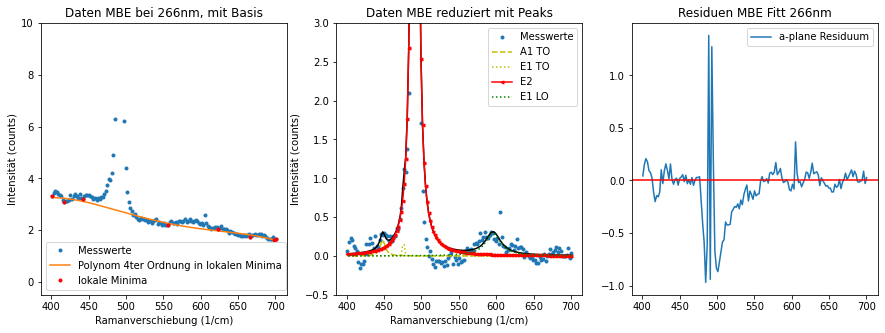

Baseparamter:  [ 5.71614357e-10 -1.37272640e-06  1.23352266e-03 -4.93499390e-01
  7.57753261e+01]

Fittdaten MBE Messung  2 :
A1 TO:  [0.7339965850908244, 14.762093537809259, 450.4765320356416]
E1 TO:  [0.7653127233295106, 5.1498489340163145, 475.0493085285604]
E2:  [40.00226862671338, 5.273601966486734, 490.84681389893075]
E1 LO:  [0.42272346837630587, 24.31552281958656, 588.7642838098608]


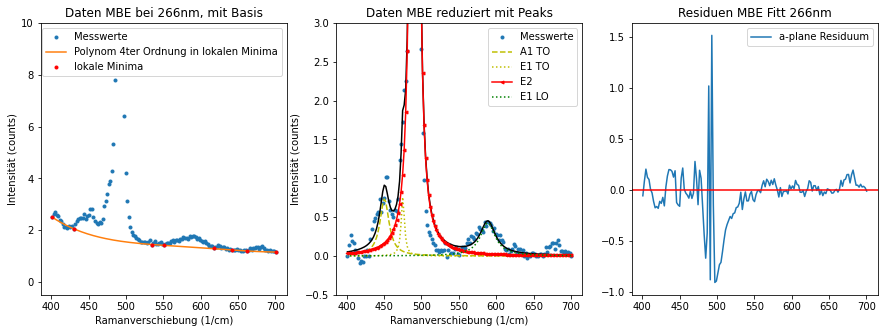

In [10]:
for i in range(len(y_daten_MBE)):
    #print("i: ", i)
    y = y_daten_MBE[i]
    #print("y: ", y)
    #----------------------------------------------------------------------------------------------------    
    
    # lokale minima für baseline alle paar messpunkte entnehmen
    ymin_roh=y[argrelextrema(y, np.less,order=5)[0]]
    xmin_roh=x[argrelextrema(y, np.less,order=5)[0]]
    #print("ymin_roh: ", ymin_roh)
    #print("xmin_roh: ", xmin_roh)
    #print(type(xmin_roh))
    
    #minima an problematischen stellen nicht mitnehmen
    xmin=[]
    ymin=[]
    xmin2=[]
    ymin2=[]
    xmin.append(x[0])
    ymin.append(y[0]) 
    for k in range(len(xmin_roh)):
        if xmin_roh[k]<=560 or xmin_roh[k]>=600:
            xmin2.append(xmin_roh[k])
            ymin2.append(ymin_roh[k])
    for j in range(len(xmin2)):
        if xmin2[j]<=450 or xmin2[j]>=500:
            xmin.append(xmin2[j])
            ymin.append(ymin2[j])
    xmin.append(x[len(x)-1])
    ymin.append(y[len(y)-1]) 
    
    # Hintergrund mit Baseline Funktion Polynom 4 aus lokalen Minima fitten
    init_vals_base = [0.1, 0.1, 0.1, 0.1, -9]
    param_bounds_base = ([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf])
    fitParams_base, cov_base = curve_fit(f=Polynom_4_Grad, xdata=xmin, ydata=ymin, p0=init_vals_base, bounds=param_bounds_base)
    ybase_P4=Polynom_4_Grad(x, fitParams_base[0], fitParams_base[1], fitParams_base[2], fitParams_base[3], fitParams_base[4])
    print("Baseparamter: ", fitParams_base)
    #Plott
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1) 
    plt.title('Daten MBE bei 266nm, mit Basis')
    plt.plot(x,y, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x, ybase_P4, label='Polynom 4ter Ordnung in lokalen Minima')
    plt.plot(xmin,ymin,'o', color='r'  ,markersize=3, label='lokale Minima') #, markerfacecolor='w', alpha=0.5
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    plt.axis(ymin=-0.5, ymax=10)
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    #Messwerte reduzieren durch Basis
    y_reduced = y - ybase_P4
    
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; E1(LO)-595 1/cm Peaks
    #Lorentz(x,a,d,w)
    init_vals_L_x4 = [1,1,450, 1,1,479, 1,1,492, 1,1,595]
    param_bounds_L_x4= ([0,0,443, 0,0,470, 0,0,480, 0,0,560,],[np.inf,15,455, np.inf,15,490, np.inf,15,500 , np.inf,50,600])
    fitParams_L_x4, cov_L_x4 = curve_fit(f=L_x4, xdata=x, ydata=y_reduced, p0=init_vals_L_x4, bounds=param_bounds_L_x4)
    
    fitParams_L_a_A1_TO = [fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2]]
    fitParams_L_a_E1_TO = [fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5]]
    fitParams_L_a_E2 = [fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8]]
    fitParams_L_a_E1_LO = [fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]]
    
    print("\nFittdaten MBE Messung ", i+1, ":")
    print("A1 TO: ",fitParams_L_a_A1_TO)
    print("E1 TO: ",fitParams_L_a_E1_TO)
    print("E2: ",fitParams_L_a_E2)
    print("E1 LO: ",fitParams_L_a_E1_LO)
    
    #Plott
    plt.subplot(1, 3, 2) 
    plt.title('Daten MBE reduziert mit Peaks')
    plt.plot(x,y_reduced, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x,L_x4(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2],fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5],fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8],fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]),color="black")
    plt.plot(x,Lorentz(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2]),'--',color="y",label='A1 TO')
    plt.plot(x,Lorentz(x,fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5]),':',color="y",label='E1 TO')
    plt.plot(x,Lorentz(x,fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8]),'-<',markersize=3,color="r",label='E2')
    plt.plot(x,Lorentz(x,fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]),':',markersize=3,color="g",label='E1 LO')
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    plt.axis(ymin=-0.5, ymax=3)
    #plt.grid(True)
    plt.legend()
    
    #----------------------------------------------------------------------------------------------------
    #Plott
    plt.subplot(1, 3, 3)
    plt.title('Residuen MBE Fitt 266nm')
    plt.plot(x,y_reduced-L_x4(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2],fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5],fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8],fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]), label=("a-plane Residuum"))
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    plt.show()

## MEPA


Fittdaten MEPA Messung  1 :
A1 TO:  [0.7002953247282794, 10.943106710482562, 448.9346150423179]
E1 TO:  [0.9400114837868739, 9.78760228881856, 474.96726140506104]
E2:  [26.968084688691686, 6.7458814423133875, 489.92648188147325]
A1 LO:  [0.5848658685413181, 15.433280917066636, 579.8253717713912]
E1 LO:  [0.6560877693159822, 12.691732035411459, 592.1951215721405]


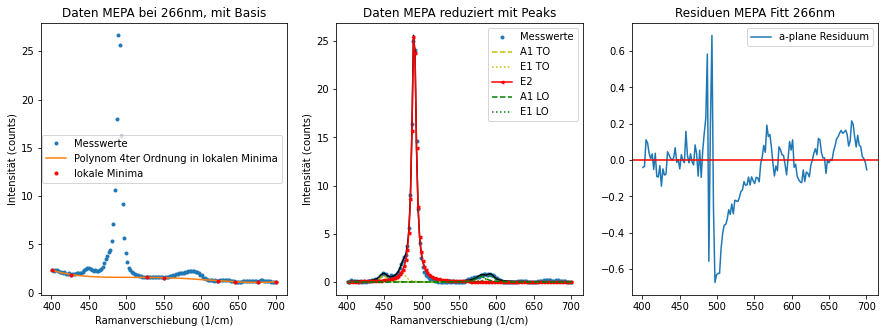


Fittdaten MEPA Messung  2 :
A1 TO:  [0.6676679731114918, 9.274366972248314, 450.11336617166035]
E1 TO:  [0.8212287862365759, 7.995524782186957, 475.4603254957506]
E2:  [26.24454430558941, 6.741793864348914, 490.2017025842031]
A1 LO:  [0.5178340243372357, 15.664119834361646, 577.6813777877445]
E1 LO:  [0.7305669773252358, 14.116468631949372, 591.334508422901]


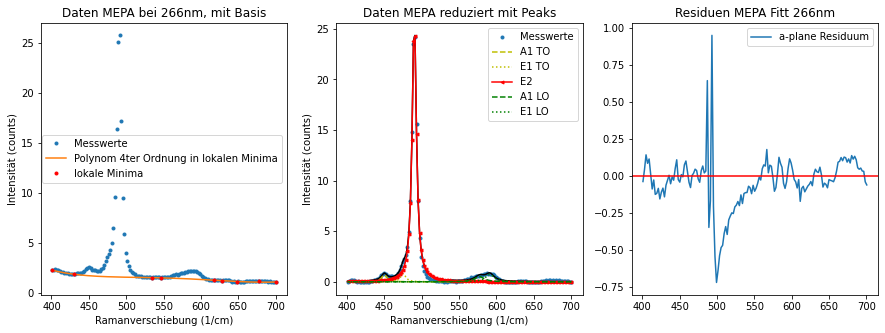

In [11]:
for i in range(len(y_daten_MEPA)):
    y = y_daten_MEPA[i]

    #----------------------------------------------------------------------------------------------------    
    
    # lokale minima für baseline alle paar messpunkte entnehmen
    ymin_roh=y[argrelextrema(y, np.less,order=4)[0]]
    xmin_roh=x[argrelextrema(y, np.less,order=4)[0]]
    
    #minima an problematischen stellen nicht mitnehmen
    xmin=[]
    ymin=[]
    xmin2=[]
    ymin2=[]
    xmin.append(x[0])
    ymin.append(y[0]) 
    for k in range(len(xmin_roh)):
        if xmin_roh[k]<=560 or xmin_roh[k]>=600:
            xmin2.append(xmin_roh[k])
            ymin2.append(ymin_roh[k])
    for j in range(len(xmin2)):
        if xmin2[j]<=450 or xmin2[j]>=500:
            xmin.append(xmin2[j])
            ymin.append(ymin2[j])
    xmin.append(x[len(x)-1])
    ymin.append(y[len(y)-1]) 
    
    # Hintergrund mit Baseline Funktion Polynom 4 aus lokalen Minima fitten
    init_vals_base = [0.1, 0.1, 0.1, 0.1, 0.1]
    param_bounds_base = ([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf])
    fitParams_base, cov_base = curve_fit(f=Polynom_4_Grad, xdata=xmin, ydata=ymin, p0=init_vals_base, bounds=param_bounds_base)
    ybase_P4=Polynom_4_Grad(x, fitParams_base[0], fitParams_base[1], fitParams_base[2], fitParams_base[3], fitParams_base[4])
    
    #Plott
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1) 
    plt.title('Daten MEPA bei 266nm, mit Basis')
    plt.plot(x,y, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x, ybase_P4, label='Polynom 4ter Ordnung in lokalen Minima')
    plt.plot(xmin,ymin,'o', color='r'  ,markersize=3, label='lokale Minima') #, markerfacecolor='w', alpha=0.5
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    #Messwerte reduzieren durch Basis
    y_reduced = y - ybase_P4
    
    #Mit 1 LO Peak
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; E1(LO)-595 1/cm Peaks
    #Lorentz(x,a,d,w)
    #init_vals_L_x4 = [1,1,450, 1,1,479, 1,1,492, 1,1,595]
    #param_bounds_L_x4= ([0,0,443, 0,0,470, 0,0,480, 0,0,560,],[np.inf,15,455, np.inf,15,490, np.inf,15,500 , np.inf,50,600])
    #fitParams_L_x4, cov_L_x4 = curve_fit(f=L_x4, xdata=x, ydata=y_reduced, p0=init_vals_L_x4, bounds=param_bounds_L_x4)
    #fitParams_L_a_A1_TO = [fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2]]
    #fitParams_L_a_E1_TO = [fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5]]
    #fitParams_L_a_E2 = [fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8]]
    #fitParams_L_a_E1_LO = [fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]]
    #print("\nFittdaten MEPA Messung ", i+1, ":")
    #print("A1 TO: ",fitParams_L_a_A1_TO)
    #print("E1 TO: ",fitParams_L_a_E1_TO)
    #print("E2: ",fitParams_L_a_E2)
    #print("E1 LO: ",fitParams_L_a_E1_LO)
    
    #Mit 2 LO Peaks:
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; A1(LO)-580; E1(LO)-595 1/cm Peaks
    #Lorentz(x,a,d,w)
    init_vals_L_x5 = [1,1,450, 1,1,479, 1,1,492, 1,1,580, 1,1,595]
    param_bounds_L_x5= ([ 0,0,440, 0,0,470, 0,0,480, 0,0,560, 0,0,580],[ np.inf,15,455, np.inf,15,490, np.inf,15,500 ,np.inf,30,590, np.inf,50,600])
    fitParams_L_x5, cov_L_x5 = curve_fit(f=L_x5, xdata=x, ydata=y_reduced, p0=init_vals_L_x5, bounds=param_bounds_L_x5)
    fitParams_L_a_A1_TO = [fitParams_L_x5[0],fitParams_L_x5[1],fitParams_L_x5[2]]
    fitParams_L_a_E1_TO = [fitParams_L_x5[3],fitParams_L_x5[4],fitParams_L_x5[5]]
    fitParams_L_a_E2 = [fitParams_L_x5[6],fitParams_L_x5[7],fitParams_L_x5[8]]
    fitParams_L_a_A1_LO = [fitParams_L_x5[9],fitParams_L_x5[10],fitParams_L_x5[11]]
    fitParams_L_a_E1_LO = [fitParams_L_x5[12],fitParams_L_x5[13],fitParams_L_x5[14]]
    print("\nFittdaten MEPA Messung ", i+1, ":")
    print("A1 TO: ",fitParams_L_a_A1_TO)
    print("E1 TO: ",fitParams_L_a_E1_TO)
    print("E2: ",fitParams_L_a_E2)
    print("A1 LO: ",fitParams_L_a_A1_LO)
    print("E1 LO: ",fitParams_L_a_E1_LO)
    
    #Plott
    plt.subplot(1, 3, 2) 
    plt.title('Daten MEPA reduziert mit Peaks')
    plt.plot(x,y_reduced, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    #plt.plot(x,L_x4(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2],fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5],fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8],fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]),color="black")
    #plt.plot(x,Lorentz(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2]),'--',color="y",label='A1 TO')
    #plt.plot(x,Lorentz(x,fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5]),':',color="y",label='E1 TO')
    #plt.plot(x,Lorentz(x,fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8]),'-<',markersize=3,color="r",label='E2')
    #plt.plot(x,Lorentz(x,fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]),':',markersize=3,color="g",label='E1 LO')
    plt.plot(x,L_x5(x,fitParams_L_x5[0],fitParams_L_x5[1],fitParams_L_x5[2],fitParams_L_x5[3],fitParams_L_x5[4],fitParams_L_x5[5],fitParams_L_x5[6],fitParams_L_x5[7],fitParams_L_x5[8],fitParams_L_x5[9],fitParams_L_x5[10],fitParams_L_x5[11],fitParams_L_x5[12],fitParams_L_x5[13],fitParams_L_x5[14]),color="black")
    plt.plot(x,Lorentz(x,fitParams_L_x5[0],fitParams_L_x5[1],fitParams_L_x5[2]),'--',color="y",label='A1 TO')
    plt.plot(x,Lorentz(x,fitParams_L_x5[3],fitParams_L_x5[4],fitParams_L_x5[5]),':',color="y",label='E1 TO')
    plt.plot(x,Lorentz(x,fitParams_L_x5[6],fitParams_L_x5[7],fitParams_L_x5[8]),'-<',markersize=3,color="r",label='E2')
    plt.plot(x,Lorentz(x,fitParams_L_x5[9],fitParams_L_x5[10],fitParams_L_x5[11]),'--',markersize=3,color="g",label='A1 LO')
    plt.plot(x,Lorentz(x,fitParams_L_x5[12],fitParams_L_x5[13],fitParams_L_x5[14]),':',markersize=3,color="g",label='E1 LO')
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()
    
    #----------------------------------------------------------------------------------------------------
    #Plott
    plt.subplot(1, 3, 3)
    plt.title('Residuen MEPA Fitt 266nm')
    #plt.plot(x,y_reduced-L_x4(x,fitParams_L_x4[0],fitParams_L_x4[1],fitParams_L_x4[2],fitParams_L_x4[3],fitParams_L_x4[4],fitParams_L_x4[5],fitParams_L_x4[6],fitParams_L_x4[7],fitParams_L_x4[8],fitParams_L_x4[9],fitParams_L_x4[10],fitParams_L_x4[11]), label=("a-plane Residuum"))
    plt.plot(x,y_reduced-L_x5(x,fitParams_L_x5[0],fitParams_L_x5[1],fitParams_L_x5[2],fitParams_L_x5[3],fitParams_L_x5[4],fitParams_L_x5[5],fitParams_L_x5[6],fitParams_L_x5[7],fitParams_L_x5[8],fitParams_L_x5[9],fitParams_L_x5[10],fitParams_L_x5[11],fitParams_L_x5[12],fitParams_L_x5[13],fitParams_L_x5[14]), label=("a-plane Residuum"))
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    plt.show()

# Fitten der Daten mit Gaussfunktionen

## a-plane


Fittdaten a-plane Messung  1 :
A1 TO:  [4.204793470997304, 4.627597870110969, 447.60458131921183]
E1 TO:  [1.726856107290966, 13.167418426616722, 482.81706922320325]
E2:  [8.328485633674024, 2.885206024088811, 489.9072432396066]
E1 LO:  [0.43172393712313206, 14.581249404685835, 584.3201454384281]


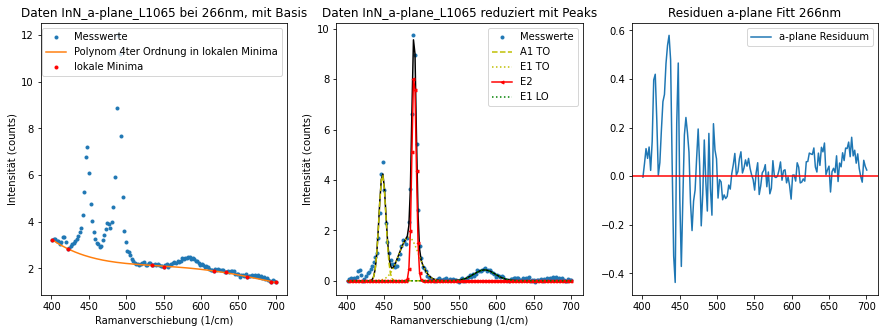


Fittdaten a-plane Messung  2 :
A1 TO:  [1.8104335048950904, 4.598191687238584, 448.4388767696644]
E1 TO:  [1.357310744527108, 11.49813361850835, 485.1052205018481]
E2:  [8.845757296197643, 2.820802812486391, 490.1623327988551]
E1 LO:  [0.3030065465089404, 16.26800655916446, 584.2998430780107]


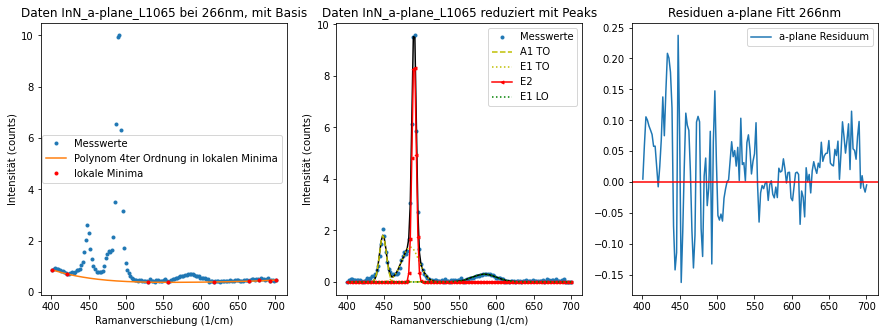

In [12]:
for i in range(len(y_daten_aplane)):
    y = y_daten_aplane[i]

    #----------------------------------------------------------------------------------------------------    
    
    # lokale minima für baseline alle paar messpunkte entnehmen
    ymin_roh=y[argrelextrema(y, np.less,order=5)[0]]
    xmin_roh=x[argrelextrema(y, np.less,order=5)[0]]
    # entfernen störender minima für basis (um TO, E2 Peak da ansonsten Polynom nicht passend an Daten)
    #for j in range(len(xmin_roh)):
    #print(i)
    #    if xmin_roh[j]>450 and xmin_roh[j]>500:
     #       xmin = np.delete(xmin_roh,j+1, axis=None)
      #      ymin = np.delete(ymin_roh,j+1, axis=None)
        
    #minima an problematischen stellen nicht mitnehmen
    xmin=[]
    ymin=[]
    xmin2=[]
    ymin2=[]
    xmin.append(x[0])
    ymin.append(y[0]) 
    for k in range(len(xmin_roh)):
        if xmin_roh[k]<=560 or xmin_roh[k]>=600:
            xmin2.append(xmin_roh[k])
            ymin2.append(ymin_roh[k])
    for j in range(len(xmin2)):
        if xmin2[j]<=450 or xmin2[j]>=500:
            xmin.append(xmin2[j])
            ymin.append(ymin2[j])
    xmin.append(x[len(x)-1])
    ymin.append(y[len(y)-1]) 
    
    # Hintergrund mit Baseline Funktion Polynom 4 aus lokalen Minima fitten
    init_vals_base = [0.1, 0.1, 0.1, 0.1, 0.1]
    param_bounds_base = ([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf])
    fitParams_base, cov_base = curve_fit(f=Polynom_4_Grad, xdata=xmin, ydata=ymin, p0=init_vals_base, bounds=param_bounds_base)
    ybase_P4=Polynom_4_Grad(x, fitParams_base[0], fitParams_base[1], fitParams_base[2], fitParams_base[3], fitParams_base[4])
    
    #Plott
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1) 
    plt.title('Daten InN_a-plane_L1065 bei 266nm, mit Basis')
    plt.plot(x,y, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x, ybase_P4, label='Polynom 4ter Ordnung in lokalen Minima')
    plt.plot(xmin,ymin,'o', color='r'  ,markersize=3, label='lokale Minima') #, markerfacecolor='w', alpha=0.5
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    #Messwerte reduzieren durch Basis
    y_reduced = y - ybase_P4
    
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; E1(LO)-595 1/cm Peaks
    #gaussian(x,a,d,w)
    init_vals_G_x4 = [1,1,450, 1,1,479, 1,1,492, 1,1,595]
    param_bounds_G_x4= ([0,0,443, 0,0,470, 0,0,480, 0,0,560,],[np.inf,15,455, np.inf,15,490, np.inf,15,500 , np.inf,50,600])
    fitParams_G_x4, cov_G_x4 = curve_fit(f=G_x4, xdata=x, ydata=y_reduced, p0=init_vals_G_x4, bounds=param_bounds_G_x4)
    
    fitParams_G_a_A1_TO = [fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]]
    fitParams_G_a_E1_TO = [fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]]
    fitParams_G_a_E2 = [fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]]
    fitParams_G_a_E1_LO = [fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]]
    
    print("\nFittdaten a-plane Messung ", i+1, ":")
    print("A1 TO: ",fitParams_G_a_A1_TO)
    print("E1 TO: ",fitParams_G_a_E1_TO)
    print("E2: ",fitParams_G_a_E2)
    print("E1 LO: ",fitParams_G_a_E1_LO)
    
    #Plott
    plt.subplot(1, 3, 2) 
    plt.title('Daten InN_a-plane_L1065 reduziert mit Peaks')
    plt.plot(x,y_reduced, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x,G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),color="black")
    plt.plot(x,gaussian(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]),'--',color="y",label='A1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]),':',color="y",label='E1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]),'-<',markersize=3,color="r",label='E2')
    plt.plot(x,gaussian(x,fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),':',markersize=3,color="g",label='E1 LO')
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()
    
    #----------------------------------------------------------------------------------------------------
    #Plott
    plt.subplot(1, 3, 3)
    plt.title('Residuen a-plane Fitt 266nm')
    plt.plot(x,y_reduced-G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]), label=("a-plane Residuum"))
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    plt.show()

## MBE

Baseparamter:  [-8.74645791e-10  1.95651948e-06 -1.61521420e-03  5.77041043e-01
 -7.19517453e+01]

Fittdaten MBE Messung  1 :
A1 TO:  [0.3089686170271702, 14.999999999998062, 454.99999999999994]
E1 TO:  [3.42862843463898, 7.536678298905226, 489.99999999999994]
E2:  [23.19683795431921, 2.316073273729426, 491.09783043306356]
E1 LO:  [0.2776875429354517, 19.195884924474374, 595.0413064370131]


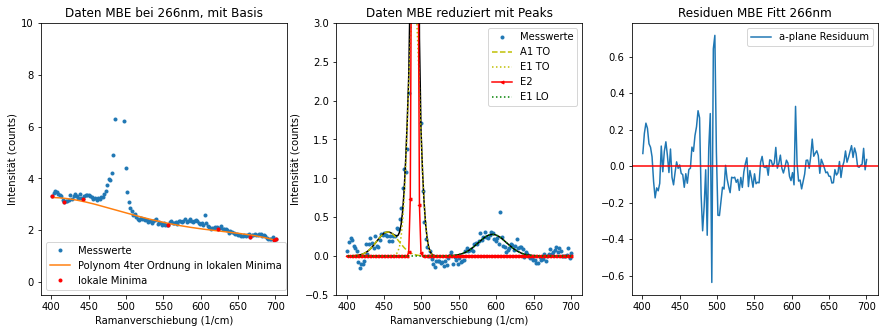

Baseparamter:  [ 5.71614357e-10 -1.37272640e-06  1.23352266e-03 -4.93499390e-01
  7.57753261e+01]

Fittdaten MBE Messung  2 :
A1 TO:  [0.8377524775281069, 14.999999999999998, 454.99999999999994]
E1 TO:  [6.031629460148944, 7.690615136490157, 489.9999999999999]
E2:  [32.3303343866444, 2.2135399491355083, 490.91985546026405]
E1 LO:  [0.37513681620047096, 20.001391564213975, 585.999303326167]


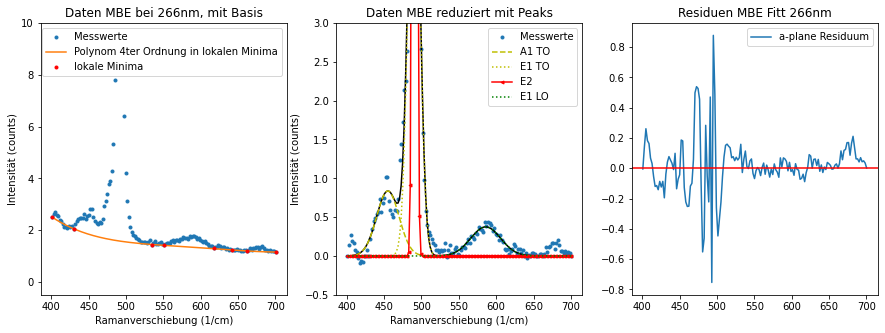

In [13]:
for i in range(len(y_daten_MBE)):
    #print("i: ", i)
    y = y_daten_MBE[i]
    #print("y: ", y)
    #----------------------------------------------------------------------------------------------------    
    
    # lokale minima für baseline alle paar messpunkte entnehmen
    ymin_roh=y[argrelextrema(y, np.less,order=5)[0]]
    xmin_roh=x[argrelextrema(y, np.less,order=5)[0]]
    #print("ymin_roh: ", ymin_roh)
    #print("xmin_roh: ", xmin_roh)
    #print(type(xmin_roh))
    
    #minima an problematischen stellen nicht mitnehmen
    xmin=[]
    ymin=[]
    xmin2=[]
    ymin2=[]
    xmin.append(x[0])
    ymin.append(y[0]) 
    for k in range(len(xmin_roh)):
        if xmin_roh[k]<=560 or xmin_roh[k]>=600:
            xmin2.append(xmin_roh[k])
            ymin2.append(ymin_roh[k])
    for j in range(len(xmin2)):
        if xmin2[j]<=450 or xmin2[j]>=500:
            xmin.append(xmin2[j])
            ymin.append(ymin2[j])
    xmin.append(x[len(x)-1])
    ymin.append(y[len(y)-1]) 
    
    # Hintergrund mit Baseline Funktion Polynom 4 aus lokalen Minima fitten
    init_vals_base = [0.1, 0.1, 0.1, 0.1, -9]
    param_bounds_base = ([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf])
    fitParams_base, cov_base = curve_fit(f=Polynom_4_Grad, xdata=xmin, ydata=ymin, p0=init_vals_base, bounds=param_bounds_base)
    ybase_P4=Polynom_4_Grad(x, fitParams_base[0], fitParams_base[1], fitParams_base[2], fitParams_base[3], fitParams_base[4])
    print("Baseparamter: ", fitParams_base)
    #Plott
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1) 
    plt.title('Daten MBE bei 266nm, mit Basis')
    plt.plot(x,y, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x, ybase_P4, label='Polynom 4ter Ordnung in lokalen Minima')
    plt.plot(xmin,ymin,'o', color='r'  ,markersize=3, label='lokale Minima') #, markerfacecolor='w', alpha=0.5
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    plt.axis(ymin=-0.5, ymax=10)
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    #Messwerte reduzieren durch Basis
    y_reduced = y - ybase_P4
    
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; E1(LO)-595 1/cm Peaks
    #gaussian(x,a,d,w)
    init_vals_G_x4 = [1,1,450, 1,1,479, 1,1,492, 1,1,595]
    param_bounds_G_x4= ([0,0,443, 0,0,470, 0,0,480, 0,0,560,],[np.inf,15,455, np.inf,15,490, np.inf,15,500 , np.inf,50,600])
    fitParams_G_x4, cov_G_x4 = curve_fit(f=G_x4, xdata=x, ydata=y_reduced, p0=init_vals_G_x4, bounds=param_bounds_G_x4)
    
    fitParams_G_a_A1_TO = [fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]]
    fitParams_G_a_E1_TO = [fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]]
    fitParams_G_a_E2 = [fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]]
    fitParams_G_a_E1_LO = [fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]]
    
    print("\nFittdaten MBE Messung ", i+1, ":")
    print("A1 TO: ",fitParams_G_a_A1_TO)
    print("E1 TO: ",fitParams_G_a_E1_TO)
    print("E2: ",fitParams_G_a_E2)
    print("E1 LO: ",fitParams_G_a_E1_LO)
    
    #Plott
    plt.subplot(1, 3, 2) 
    plt.title('Daten MBE reduziert mit Peaks')
    plt.plot(x,y_reduced, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x,G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),color="black")
    plt.plot(x,gaussian(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]),'--',color="y",label='A1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]),':',color="y",label='E1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]),'-<',markersize=3,color="r",label='E2')
    plt.plot(x,gaussian(x,fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),':',markersize=3,color="g",label='E1 LO')
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    plt.axis(ymin=-0.5, ymax=3)
    #plt.grid(True)
    plt.legend()
    
    #----------------------------------------------------------------------------------------------------
    #Plott
    plt.subplot(1, 3, 3)
    plt.title('Residuen MBE Fitt 266nm')
    plt.plot(x,y_reduced-G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]), label=("a-plane Residuum"))
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    plt.show()

## MEPA


Fittdaten MEPA Messung  1 :
A1 TO:  [0.7547733010420717, 13.914500480325952, 454.99999999999915]
E1 TO:  [5.2576856237735905, 9.068822699420334, 488.2132159351608]
E2:  [20.700514253119305, 2.7263398985360507, 490.0201670364969]
A1 LO:  [0.5272364906430446, 10.946304525197721, 576.4418843450583]
E1 LO:  [0.6139900964283463, 7.825098246172444, 592.2007800227082]


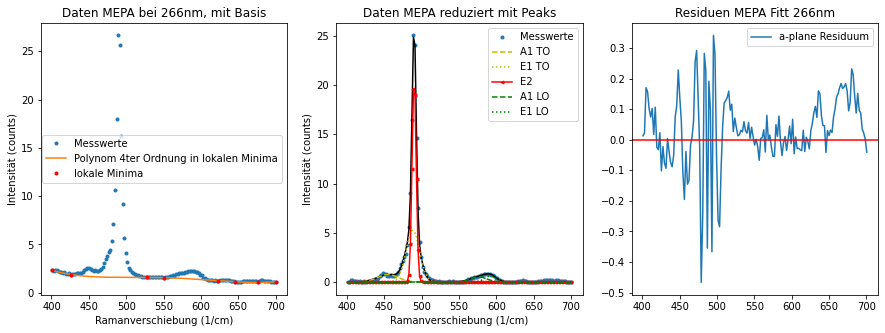


Fittdaten MEPA Messung  2 :
A1 TO:  [0.7042596590465613, 10.753991556385222, 453.73056363170764]
E1 TO:  [4.865172922969479, 9.330859457274666, 488.2969506541266]
E2:  [20.362943241694325, 2.7584780303895515, 490.3040559367695]
A1 LO:  [0.5687514897998979, 13.087078962149233, 578.1232575662078]
E1 LO:  [0.49741175696439904, 7.55847419431857, 592.4002680902878]


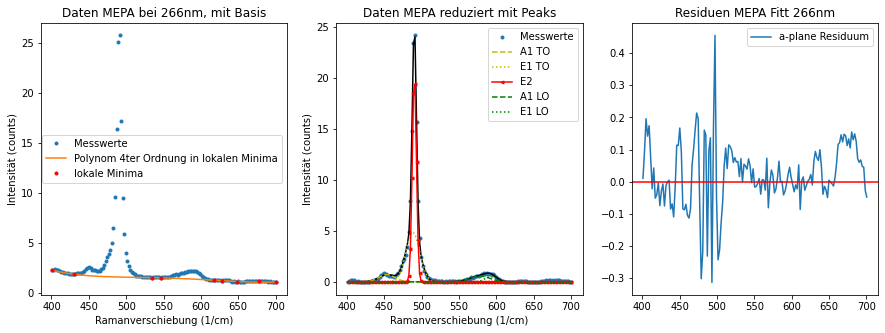

In [14]:
for i in range(len(y_daten_MEPA)):
    y = y_daten_MEPA[i]

    #----------------------------------------------------------------------------------------------------    
    
    # lokale minima für baseline alle paar messpunkte entnehmen
    ymin_roh=y[argrelextrema(y, np.less,order=4)[0]]
    xmin_roh=x[argrelextrema(y, np.less,order=4)[0]]
    
    #minima an problematischen stellen nicht mitnehmen
    xmin=[]
    ymin=[]
    xmin2=[]
    ymin2=[]
    xmin.append(x[0])
    ymin.append(y[0]) 
    for k in range(len(xmin_roh)):
        if xmin_roh[k]<=560 or xmin_roh[k]>=600:
            xmin2.append(xmin_roh[k])
            ymin2.append(ymin_roh[k])
    for j in range(len(xmin2)):
        if xmin2[j]<=450 or xmin2[j]>=500:
            xmin.append(xmin2[j])
            ymin.append(ymin2[j])
    xmin.append(x[len(x)-1])
    ymin.append(y[len(y)-1]) 
    
    # Hintergrund mit Baseline Funktion Polynom 4 aus lokalen Minima fitten
    init_vals_base = [0.1, 0.1, 0.1, 0.1, 0.1]
    param_bounds_base = ([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf])
    fitParams_base, cov_base = curve_fit(f=Polynom_4_Grad, xdata=xmin, ydata=ymin, p0=init_vals_base, bounds=param_bounds_base)
    ybase_P4=Polynom_4_Grad(x, fitParams_base[0], fitParams_base[1], fitParams_base[2], fitParams_base[3], fitParams_base[4])
    
    #Plott
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1) 
    plt.title('Daten MEPA bei 266nm, mit Basis')
    plt.plot(x,y, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x, ybase_P4, label='Polynom 4ter Ordnung in lokalen Minima')
    plt.plot(xmin,ymin,'o', color='r'  ,markersize=3, label='lokale Minima') #, markerfacecolor='w', alpha=0.5
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    #Messwerte reduzieren durch Basis
    y_reduced = y - ybase_P4
    
    #Mit 1 LO Peak
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; E1(LO)-595 1/cm Peaks
    #gaussian(x,a,d,w)
    #init_vals_G_x4 = [1,1,450, 1,1,479, 1,1,492, 1,1,595]
    #param_bounds_G_x4= ([0,0,443, 0,0,470, 0,0,480, 0,0,560,],[np.inf,15,455, np.inf,15,490, np.inf,15,500 , np.inf,50,600])
    #fitParams_G_x4, cov_G_x4 = curve_fit(f=G_x4, xdata=x, ydata=y_reduced, p0=init_vals_G_x4, bounds=param_bounds_G_x4)
    #fitParams_G_a_A1_TO = [fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]]
    #fitParams_G_a_E1_TO = [fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]]
    #fitParams_G_a_E2 = [fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]]
    #fitParams_G_a_E1_LO = [fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]]
    #print("\nFittdaten MEPA Messung ", i+1, ":")
    #print("A1 TO: ",fitParams_G_a_A1_TO)
    #print("E1 TO: ",fitParams_G_a_E1_TO)
    #print("E2: ",fitParams_G_a_E2)
    #print("E1 LO: ",fitParams_G_a_E1_LO)
    
    #Mit 2 LO Peaks:
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; A1(LO)-580; E1(LO)-595 1/cm Peaks
    #gaussian(x,a,d,w)
    init_vals_G_x5 = [1,1,450, 1,1,479, 1,1,492, 1,1,580, 1,1,595]
    param_bounds_G_x5= ([ 0,0,440, 0,0,470, 0,0,480, 0,0,560, 0,0,580],[ np.inf,15,455, np.inf,15,490, np.inf,15,500 ,np.inf,30,590, np.inf,50,600])
    fitParams_G_x5, cov_G_x5 = curve_fit(f=G_x5, xdata=x, ydata=y_reduced, p0=init_vals_G_x5, bounds=param_bounds_G_x5)
    fitParams_G_a_A1_TO = [fitParams_G_x5[0],fitParams_G_x5[1],fitParams_G_x5[2]]
    fitParams_G_a_E1_TO = [fitParams_G_x5[3],fitParams_G_x5[4],fitParams_G_x5[5]]
    fitParams_G_a_E2 = [fitParams_G_x5[6],fitParams_G_x5[7],fitParams_G_x5[8]]
    fitParams_G_a_A1_LO = [fitParams_G_x5[9],fitParams_G_x5[10],fitParams_G_x5[11]]
    fitParams_G_a_E1_LO = [fitParams_G_x5[12],fitParams_G_x5[13],fitParams_G_x5[14]]
    print("\nFittdaten MEPA Messung ", i+1, ":")
    print("A1 TO: ",fitParams_G_a_A1_TO)
    print("E1 TO: ",fitParams_G_a_E1_TO)
    print("E2: ",fitParams_G_a_E2)
    print("A1 LO: ",fitParams_G_a_A1_LO)
    print("E1 LO: ",fitParams_G_a_E1_LO)
    
    #Plott
    plt.subplot(1, 3, 2) 
    plt.title('Daten MEPA reduziert mit Peaks')
    plt.plot(x,y_reduced, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    #plt.plot(x,G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),color="black")
    #plt.plot(x,gaussian(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]),'--',color="y",label='A1 TO')
    #plt.plot(x,gaussian(x,fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]),':',color="y",label='E1 TO')
    #plt.plot(x,gaussian(x,fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]),'-<',markersize=3,color="r",label='E2')
    #plt.plot(x,gaussian(x,fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),':',markersize=3,color="g",label='E1 LO')
    plt.plot(x,G_x5(x,fitParams_G_x5[0],fitParams_G_x5[1],fitParams_G_x5[2],fitParams_G_x5[3],fitParams_G_x5[4],fitParams_G_x5[5],fitParams_G_x5[6],fitParams_G_x5[7],fitParams_G_x5[8],fitParams_G_x5[9],fitParams_G_x5[10],fitParams_G_x5[11],fitParams_G_x5[12],fitParams_G_x5[13],fitParams_G_x5[14]),color="black")
    plt.plot(x,gaussian(x,fitParams_G_x5[0],fitParams_G_x5[1],fitParams_G_x5[2]),'--',color="y",label='A1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x5[3],fitParams_G_x5[4],fitParams_G_x5[5]),':',color="y",label='E1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x5[6],fitParams_G_x5[7],fitParams_G_x5[8]),'-<',markersize=3,color="r",label='E2')
    plt.plot(x,gaussian(x,fitParams_G_x5[9],fitParams_G_x5[10],fitParams_G_x5[11]),'--',markersize=3,color="g",label='A1 LO')
    plt.plot(x,gaussian(x,fitParams_G_x5[12],fitParams_G_x5[13],fitParams_G_x5[14]),':',markersize=3,color="g",label='E1 LO')
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()
    
    #----------------------------------------------------------------------------------------------------
    #Plott
    plt.subplot(1, 3, 3)
    plt.title('Residuen MEPA Fitt 266nm')
    #plt.plot(x,y_reduced-G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]), label=("a-plane Residuum"))
    plt.plot(x,y_reduced-G_x5(x,fitParams_G_x5[0],fitParams_G_x5[1],fitParams_G_x5[2],fitParams_G_x5[3],fitParams_G_x5[4],fitParams_G_x5[5],fitParams_G_x5[6],fitParams_G_x5[7],fitParams_G_x5[8],fitParams_G_x5[9],fitParams_G_x5[10],fitParams_G_x5[11],fitParams_G_x5[12],fitParams_G_x5[13],fitParams_G_x5[14]), label=("a-plane Residuum"))
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    plt.show()

c:\users\f.h\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Fittdaten MEPA Messung  1 :
A1 TO:  [0.7796007128057213, 14.403792962770677, 454.99999999991616]
E1 TO:  [5.272005792613558, 9.042568302291375, 488.23600408215935]
E2:  [20.687000278055244, 2.7248289739326466, 490.0201959118633]
E1 LO:  [0.8228070942457631, 12.889842865859375, 585.2640094685338]


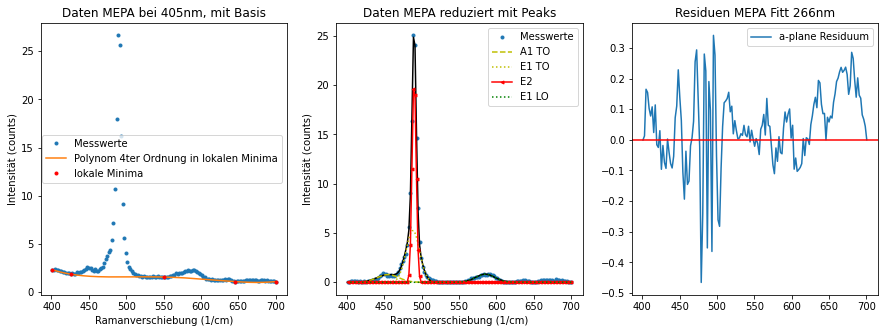

c:\users\f.h\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Fittdaten MEPA Messung  2 :
A1 TO:  [0.7221218081499226, 11.142145513480394, 453.81285018928406]
E1 TO:  [4.891025896673512, 9.308300486176964, 488.32094788848184]
E2:  [20.347206386991232, 2.7565751822344233, 490.30380309476976]
E1 LO:  [0.8358643528880294, 13.790885052633286, 584.9012175471771]


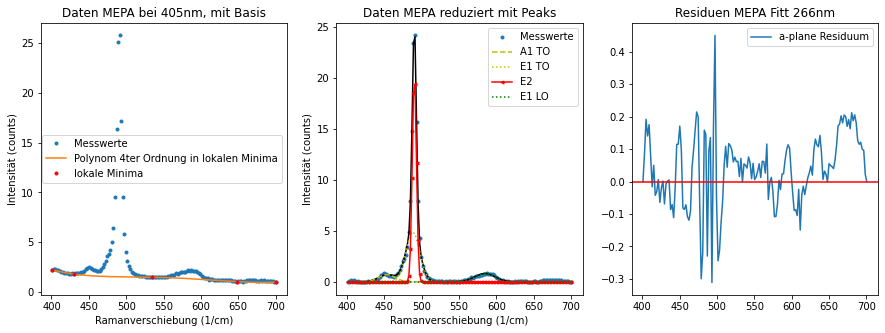

In [8]:
for i in range(len(y_daten_MEPA)):
    y = y_daten_MEPA[i]

    #----------------------------------------------------------------------------------------------------    
    
    # lokale minima für baseline alle paar messpunkte entnehmen
    ymin_roh=y[argrelextrema(y, np.less,order=10)[0]]
    xmin_roh=x[argrelextrema(y, np.less,order=10)[0]]
    # entfernen störender minima für basis (um TO, E2 Peak da ansonsten Polynom nicht passend an Daten)
    #for j in range(len(xmin_roh)):
    #print(i)
     #   if xmin_roh[j]>450 and xmin_roh[j]>500:
      #      xmin = np.delete(xmin_roh,j+1, axis=None)
       #     ymin = np.delete(ymin_roh,j+1, axis=None)
        
    #minima an problematischen stellen nicht mitnehmen
    xmin=[]
    ymin=[]
    xmin2=[]
    ymin2=[]
    xmin.append(x[0])
    ymin.append(y[0]) 
    for k in range(len(xmin_roh)):
        if xmin_roh[k]<=560 or xmin_roh[k]>=600:
            xmin2.append(xmin_roh[k])
            ymin2.append(ymin_roh[k])
    for j in range(len(xmin2)):
        if xmin2[j]<=450 or xmin2[j]>=500:
            xmin.append(xmin2[j])
            ymin.append(ymin2[j])
    xmin.append(x[len(x)-1])
    ymin.append(y[len(y)-1]) 
        
    # Hintergrund mit Baseline Funktion Polynom 4 aus lokalen Minima fitten
    init_vals_base = [0.1, 0.1, 0.1, 0.1, 0.1]
    param_bounds_base = ([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf])
    fitParams_base, cov_base = curve_fit(f=Polynom_4_Grad, xdata=xmin, ydata=ymin, p0=init_vals_base, bounds=param_bounds_base)
    ybase_P4=Polynom_4_Grad(x, fitParams_base[0], fitParams_base[1], fitParams_base[2], fitParams_base[3], fitParams_base[4])
    
    #Plott
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1) 
    plt.title('Daten MEPA bei 405nm, mit Basis')
    plt.plot(x,y, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x, ybase_P4, label='Polynom 4ter Ordnung in lokalen Minima')
    plt.plot(xmin,ymin,'o', color='r'  ,markersize=3, label='lokale Minima') #, markerfacecolor='w', alpha=0.5
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    #Messwerte reduzieren durch Basis
    y_reduced = y - ybase_P4
    
    #Fitten Messwerte für A1(TO)-450; E1(TO)-479; E2-492; E1(LO)-595 1/cm Peaks
    #gaussian(x,a,d,w)
    init_vals_G_x4 = [1,1,450, 1,1,479, 1,1,492, 1,1,595]
    param_bounds_G_x4= ([0,0,443, 0,0,470, 0,0,480, 0,0,560,],[np.inf,15,455, np.inf,15,490, np.inf,15,500 , np.inf,50,600])
    fitParams_G_x4, cov_G_x4 = curve_fit(f=G_x4, xdata=x, ydata=y_reduced, p0=init_vals_G_x4, bounds=param_bounds_G_x4)
    
    fitParams_G_a_A1_TO = [fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]]
    fitParams_G_a_E1_TO = [fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]]
    fitParams_G_a_E2 = [fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]]
    fitParams_G_a_E1_LO = [fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]]
    
    print("\nFittdaten MEPA Messung ", i+1, ":")
    print("A1 TO: ",fitParams_G_a_A1_TO)
    print("E1 TO: ",fitParams_G_a_E1_TO)
    print("E2: ",fitParams_G_a_E2)
    print("E1 LO: ",fitParams_G_a_E1_LO)
    
    #Plott
    plt.subplot(1, 3, 2) 
    plt.title('Daten MEPA reduziert mit Peaks')
    plt.plot(x,y_reduced, 'o'  ,markersize=3, label='Messwerte') #, markerfacecolor='w', alpha=0.5
    plt.plot(x,G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),color="black")
    plt.plot(x,gaussian(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2]),'--',color="y",label='A1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5]),':',color="y",label='E1 TO')
    plt.plot(x,gaussian(x,fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8]),'-<',markersize=3,color="r",label='E2')
    plt.plot(x,gaussian(x,fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]),':',markersize=3,color="g",label='E1 LO')
    plt.xlabel('Ramanverschiebung (1/cm)')
    plt.ylabel('Intensität (counts)')
    #plt.grid(True)
    plt.legend()
    
    #----------------------------------------------------------------------------------------------------
    #Plott
    plt.subplot(1, 3, 3)
    plt.title('Residuen MEPA Fitt 266nm')
    plt.plot(x,y_reduced-G_x4(x,fitParams_G_x4[0],fitParams_G_x4[1],fitParams_G_x4[2],fitParams_G_x4[3],fitParams_G_x4[4],fitParams_G_x4[5],fitParams_G_x4[6],fitParams_G_x4[7],fitParams_G_x4[8],fitParams_G_x4[9],fitParams_G_x4[10],fitParams_G_x4[11]), label=("a-plane Residuum"))
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    #plt.grid(True)
    plt.legend()

    #----------------------------------------------------------------------------------------------------
    plt.show()